In [33]:
# Import pandas for dataframes, seaborn and mathplotlib for generating visualisations.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt, figure

In [34]:
# Read in the data and name the columns
genre_ratings = pd.read_csv(r"\\wsl$\Ubuntu\home\tegarta2\CA4022-MovieLens-cleaning-and-analysis\outputs\hive\genres\000000_0", header=None)
genre_ratings.columns = ["Genre", "Rating", "Count"]


genre_ratings.head()

,Genre,Rating,Count
0,Drama,4.0,12360
1,Comedy,4.0,9659
2,Comedy,3.0,8306
3,Action,4.0,7678
4,Drama,3.0,7541
...,...,...,...
194,Film-Noir,1.5,4
195,(no genres listed),1.0,2
196,(no genres listed),0.5,2
197,(no genres listed),2.0,2


In [35]:
# Pivot the data so we have it in a format we can use to generate the visualisation.
pivoted_genre = genre_ratings.pivot(index='Genre', columns='Rating', values='Count')
pivoted_genre.head()

Rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Genre,,,,,,,,,,
(no genres listed),2.0,2.0,NaN,2.0,6.0,6.0,6.0,8.0,8.0,7.0
Action,449.0,904.0,577.0,2548.0,1777.0,6331.0,4153.0,7678.0,2468.0,3750.0
Adventure,306.0,627.0,415.0,1769.0,1352.0,4838.0,3285.0,6392.0,2027.0,3150.0
Animation,80.0,116.0,96.0,346.0,365.0,1279.0,1051.0,1988.0,682.0,985.0
Children,169.0,301.0,161.0,721.0,530.0,2054.0,1205.0,2358.0,648.0,1061.0


In [36]:
# Consolidate the half stars into the next star up. e.g. 3.5 -> 4
ratings_grouped = [(0.5, 1), (1.5, 2), (2.5, 3), (3.5, 4), (4.5, 5)]
for pair in ratings_grouped: 
    pivoted_genre[pair[1]] = pivoted_genre[pair[0]] + pivoted_genre[pair[1]]
    pivoted_genre.drop(axis=1, columns=[pair[0]], inplace=True)

pivoted_genre.head()

Rating,1.0,2.0,3.0,4.0,5.0
Genre,,,,,
(no genres listed),4.0,NaN,12.0,14.0,15.0
Action,1353.0,3125.0,8108.0,11831.0,6218.0
Adventure,933.0,2184.0,6190.0,9677.0,5177.0
Animation,196.0,442.0,1644.0,3039.0,1667.0
Children,470.0,882.0,2584.0,3563.0,1709.0
Comedy,1949.0,4300.0,10836.0,14745.0,7223.0
Crime,473.0,1186.0,3888.0,6678.0,4456.0
Documentary,22.0,35.0,205.0,643.0,314.0
Drama,1200.0,2824.0,9463.0,17874.0,10567.0


In [37]:
# Sort the rows so that we have the bars ordered.
sorted_indices = pivoted_genre.sum(axis=1).sort_values(ascending=True).index

pivoted_genre = pivoted_genre.loc[sorted_indices, :]
pivoted_genre.head()

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
       'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror',
       'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary',
       'Film-Noir', '(no genres listed)'],
      dtype='object', name='Genre')


Rating,1.0,2.0,3.0,4.0,5.0
Genre,,,,,
(no genres listed),4.0,NaN,12.0,14.0,15.0
Film-Noir,14.0,37.0,123.0,400.0,296.0
Documentary,22.0,35.0,205.0,643.0,314.0
Western,68.0,153.0,512.0,744.0,453.0
Musical,132.0,305.0,1107.0,1716.0,878.0
IMAX,123.0,270.0,917.0,1801.0,1034.0
War,130.0,251.0,923.0,2001.0,1554.0
Animation,196.0,442.0,1644.0,3039.0,1667.0
Horror,526.0,1025.0,1921.0,2538.0,1281.0


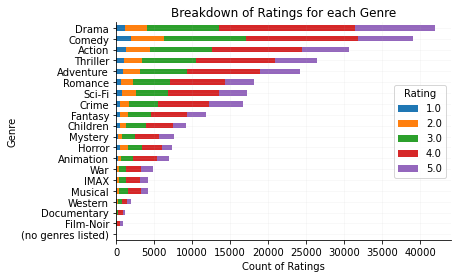

In [38]:
# Create the plot and save.
ax = pivoted_genre.plot.barh(stacked=True)
ax.set_title('Breakdown of Ratings for each Genre')
plt.legend(title="Rating", loc=7)
plt.xlabel("Count of Ratings")

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.grid(alpha=0.1)
plt.savefig("genre_breakdown.png", dpi=300, bbox_inches="tight", facecolor='w')

In [39]:
# Now let us take the proportion of ratings in each genre
pivoted_genre = pivoted_genre.div(pivoted_genre.sum(axis=1), axis=0)
pivoted_genre

Rating,1.0,2.0,3.0,4.0,5.0
Genre,,,,,
(no genres listed),0.088889,NaN,0.266667,0.311111,0.333333
Film-Noir,0.016092,0.042529,0.141379,0.459770,0.340230
Documentary,0.018048,0.028712,0.168171,0.527482,0.257588
Western,0.035233,0.079275,0.265285,0.385492,0.234715
Musical,0.031899,0.073707,0.267521,0.414693,0.212180
IMAX,0.029674,0.065139,0.221230,0.434499,0.249457
War,0.026754,0.051657,0.189957,0.411813,0.319819
Animation,0.028048,0.063251,0.235260,0.434888,0.238552
Horror,0.072144,0.140584,0.263476,0.348100,0.175696


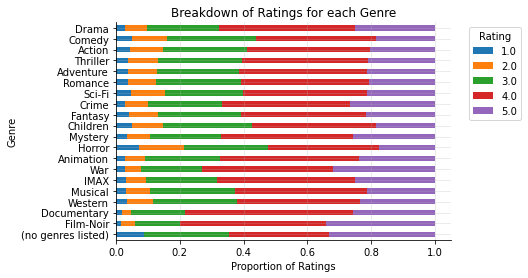

In [40]:
# Now generate the plot for the proportional barchart.
ax = pivoted_genre.plot.barh(stacked=True)
ax.set_title('Breakdown of Ratings for each Genre')
plt.legend(title="Rating", bbox_to_anchor=(1.04, 1))
plt.xlabel("Proportion of Ratings")

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.grid(alpha=0.3)
plt.savefig("genre_breakdown_proportions.png", dpi=300, bbox_inches="tight", facecolor='w')

In [42]:
# Read in the cleaned data. Name the columns. Convert the string to datetime.
data = pd.read_csv(r"\\wsl$\Ubuntu\home\tegarta2\CA4022-MovieLens-cleaning-and-analysis\outputs\querying\part-m-00000", header=None)
data.columns = ["UserId", "MovieId", "Title", "Rating", "Rating_timestamp", "Year", "Genres"] # "Tag", "Tag_timestamp"]
data['Rating_timestamp'] =  pd.to_datetime(data['Rating_timestamp'])
# data['Tag_timestamp'] =  pd.to_datetime(data['Tag_timestamp'])

Index(['UserId', 'MovieId', 'Title', 'Rating', 'Rating_timestamp', 'Year',
       'Genres'],
      dtype='object')


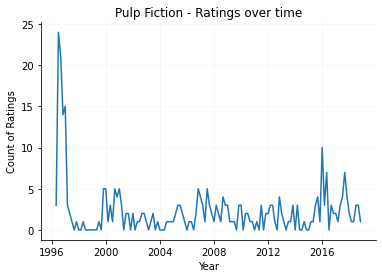

In [45]:
# Take only the ratings for a specific movie.
reduced_data = data.loc[data["Title"] == "Pulp Fiction"][["Rating_timestamp"]]
print(data.columns)

# Resample the data so we aggregate the ratings every 2 months.
sampled = reduced_data.resample('2M', on='Rating_timestamp').count()

x = sampled.index
y = sampled['Rating_timestamp']

# Create the plot.
plt.plot(sampled["Rating_timestamp"])
plt.title('Pulp Fiction - Ratings over time')
plt.ylabel("Count of Ratings")
plt.xlabel("Year")

plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.grid(alpha=0.1)

# plt.yscale("log")
plt.savefig("pulp_ratings_over_time.png", dpi=300, bbox_inches="tight", facecolor='w')

Index(['UserId', 'MovieId', 'Title', 'Rating', 'Rating_timestamp', 'Year',
       'Genres'],
      dtype='object')


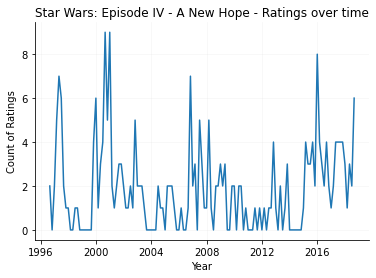

In [46]:
# Take only the ratings for a specific movie.
reduced_data = data.loc[data["Title"] == "Star Wars: Episode IV - A New Hope"][["Rating_timestamp"]]
print(data.columns)

# Resample the data so we aggregate the ratings every 2 months.
sampled = reduced_data.resample('2M', on='Rating_timestamp').count()

x = sampled.index
y = sampled['Rating_timestamp']

# Create the plot.
plt.plot(sampled["Rating_timestamp"])
plt.title('Star Wars: Episode IV - A New Hope - Ratings over time')
plt.ylabel("Count of Ratings")
plt.xlabel("Year")

plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.grid(alpha=0.1)

# plt.yscale("log")
plt.savefig("star_ratings_over_time.png", dpi=300, bbox_inches="tight", facecolor='w')

Index(['UserId', 'MovieId', 'Title', 'Rating', 'Rating_timestamp', 'Year',
       'Genres'],
      dtype='object')


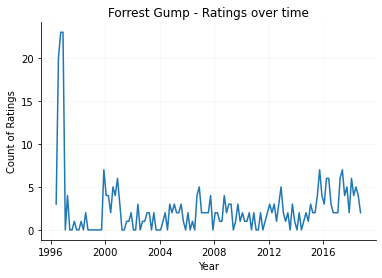

In [47]:
# Take only the ratings for a specific movie.
reduced_data = data.loc[data["Title"] == "Forrest Gump"][["Rating_timestamp"]]
print(data.columns)

# Resample the data so we aggregate the ratings every 2 months.
sampled = reduced_data.resample('2M', on='Rating_timestamp').count()

x = sampled.index
y = sampled['Rating_timestamp']

# Create the plot.
plt.plot(sampled["Rating_timestamp"])
plt.title('Forrest Gump - Ratings over time')
plt.ylabel("Count of Ratings")
plt.xlabel("Year")

plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.grid(alpha=0.1)

# plt.yscale("log")
plt.savefig("forrest_ratings_over_time.png", dpi=300, bbox_inches="tight", facecolor='w')